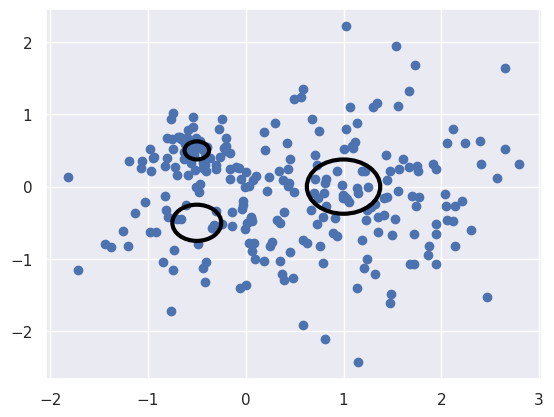

In [17]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

np.random.seed(123)

points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))


plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3, color='black'))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3, color='black'))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3, color='black'))

plt.show()

In [2]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [63]:
k = 3

initialize_centroids(points, k)

array([[ 1.13577635,  0.88339645],
       [-0.48979062, -0.7909251 ],
       [-0.52467117,  0.44625424]])

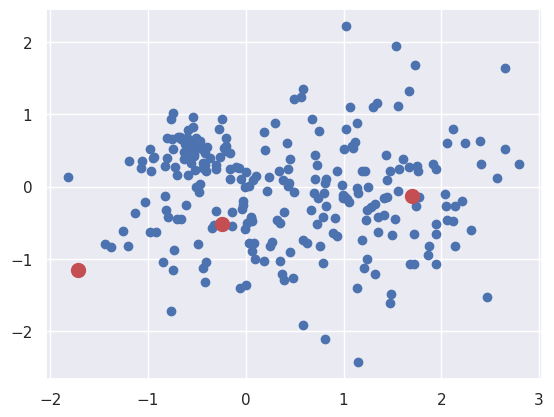

In [64]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [3]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    print(distances.shape)
    return np.argmin(distances, axis=0)

In [66]:
c = initialize_centroids(points, 3)
closest_centroid(points, c)

(3, 250)


array([1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1,
       1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2,
       0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2,
       1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1])

In [4]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [68]:
move_centroids(points, closest_centroid(points, c), c)

(3, 250)


array([[ 1.7961728 , -0.93253041],
       [ 0.14323611,  0.32385657],
       [ 0.56585428, -0.69198825]])

Centroids:
 [[ 1.13577635  0.88339645]
 [-0.48979062 -0.7909251 ]
 [-0.52467117  0.44625424]]
(3, 250)
Centroids [[ 1.43117499  0.1444834 ]
 [ 0.00516847 -0.83248548]
 [-0.42742028  0.3955972 ]]


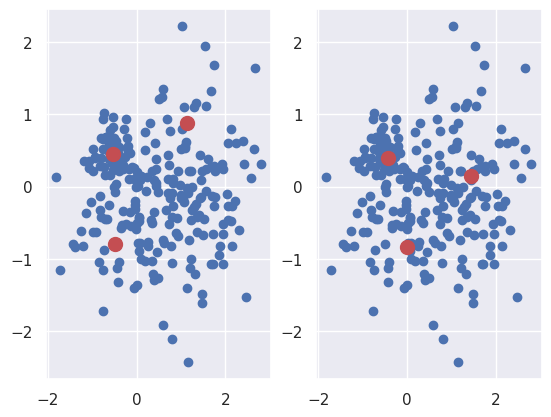

In [18]:
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
# print("Points", points)
centroids = initialize_centroids(points, 3)
print("Centroids:\n", centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
print("Centroids", centroids)

(3, 250)
(3, 250)


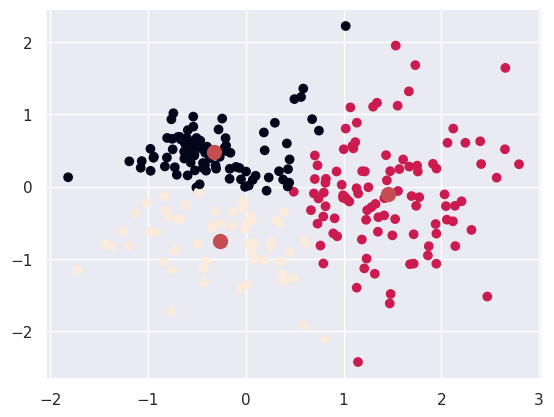

In [70]:
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
k=3
centroids = initialize_centroids(points, k)

def init():
    scra_1 = ax.scatter(points[:, 0], points[:, 1], c=closest)
    scra_2 = ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return scra_1, scra_2

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    scra_1 = ax.scatter(points[:, 0], points[:, 1], c=closest)
    scra_2 = ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return scra_1, scra_2

animation.FuncAnimation(fig, animate, init_func=None,
                        frames=10, interval=200, blit=True)
plt.show()